# TRENDS DIFFERENT SIZE SET1


### ENERGY ERROR

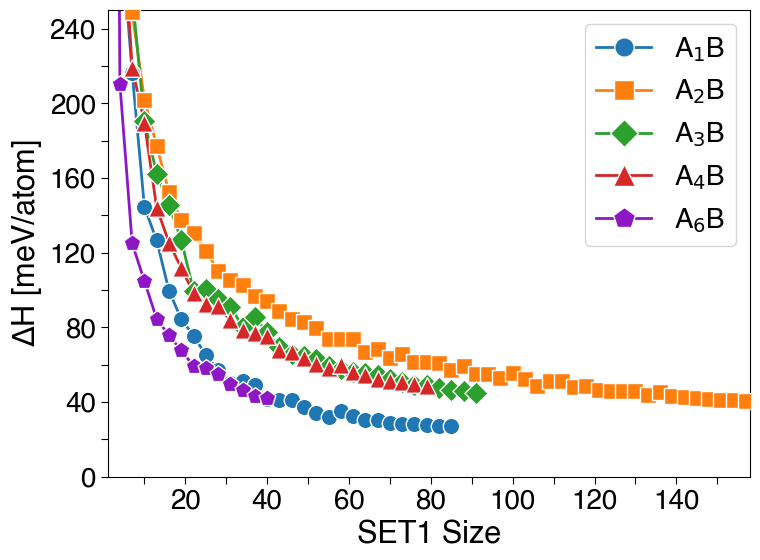

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from pyfonts import load_font
from matplotlib.font_manager import FontProperties

matplotlib.rcParams['font.family'] = 'Helvetica'

plt.rcParams['font.size'] = 20

mother_dir = './HvsINIT/'

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
fig.subplots_adjust(hspace=0.0)
max_x_ticks = np.array([])

complist = [1,2,3,4,6]
markerlist = ['o', 's', 'D', '^', 'p']
sizelist = [140, 140, 140, 160, 160]
colorlist = ['#1f77b4', '#ff7f0e', "#2CA02C", '#d62728', "#8d17c4"]
for i, comp in enumerate(complist):
    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1)
    ax.scatter(x[::3], tot[0][::3], marker=markerlist[i], edgecolor='white', s=sizelist[i], color=colorlist[i], zorder =10)
    ax.plot(x[::3], tot[0][::3] , color=colorlist[i], lw=2)
    ax.add_artist(plt.Line2D([-10], [0], color=colorlist[i], lw=2, marker=markerlist[i], markeredgecolor = 'white', markersize=sizelist[i]/10, label=f'A$_{comp}$B'))
    max_x_ticks = np.append(max_x_ticks, len(tot[0]))

ax.set_ylabel(r'$\Delta$H [meV/atom]', fontsize=22)

ax.set_ylim(0,250)
yticks = np.arange(0, 251, 40)
ax.set_yticks(yticks)   
ax.set_yticklabels([f'{i:.0f}' for i in yticks])
ax.yaxis.set_major_locator(plt.MultipleLocator(20))


ax.set_xlabel('SET1 Size', fontsize=22)

xticks = np.arange(0, max(max_x_ticks)+1, 20)
ax.set_xticks(xticks)
ax.set_xlim(1,max(max_x_ticks)+1)
ax.set_xticklabels([f'{i:.0f}' for i in xticks])
ax.xaxis.set_major_locator(plt.MultipleLocator(10))

ax.tick_params(size=5, labelsize=20)

ax.legend(loc='upper right', ncol=1)

plt.tight_layout()
plt.show()
fig.savefig('FIG/Articolo/SET1_DH.svg', bbox_inches='tight')


# TEMPLATE ANALYSIS

### BEST TEMPLATES

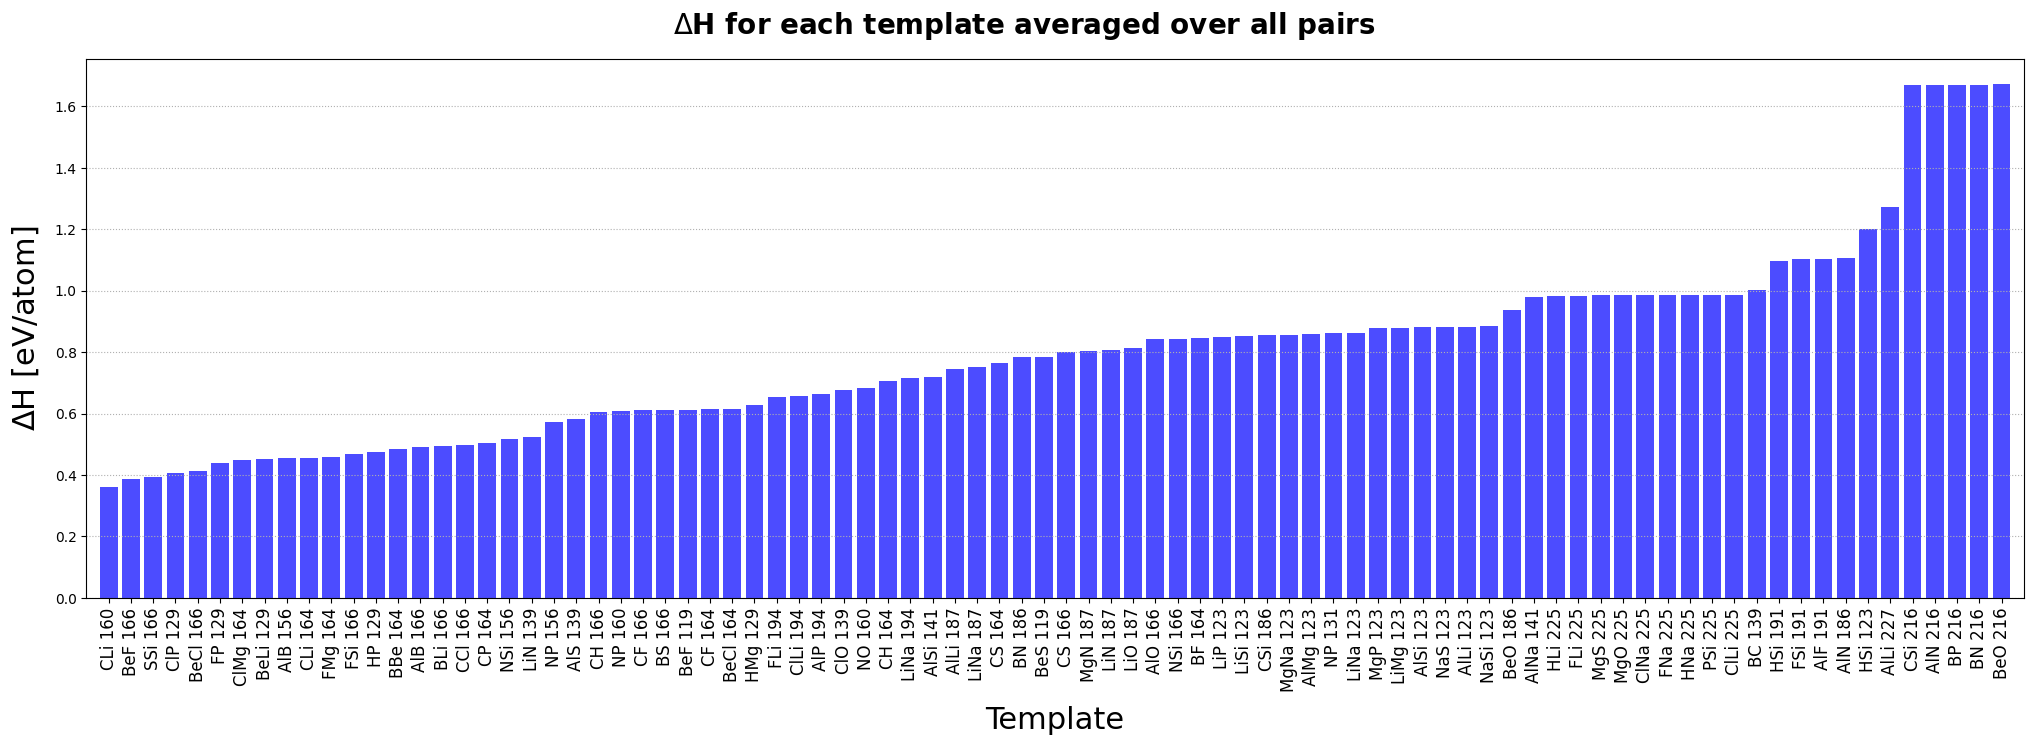

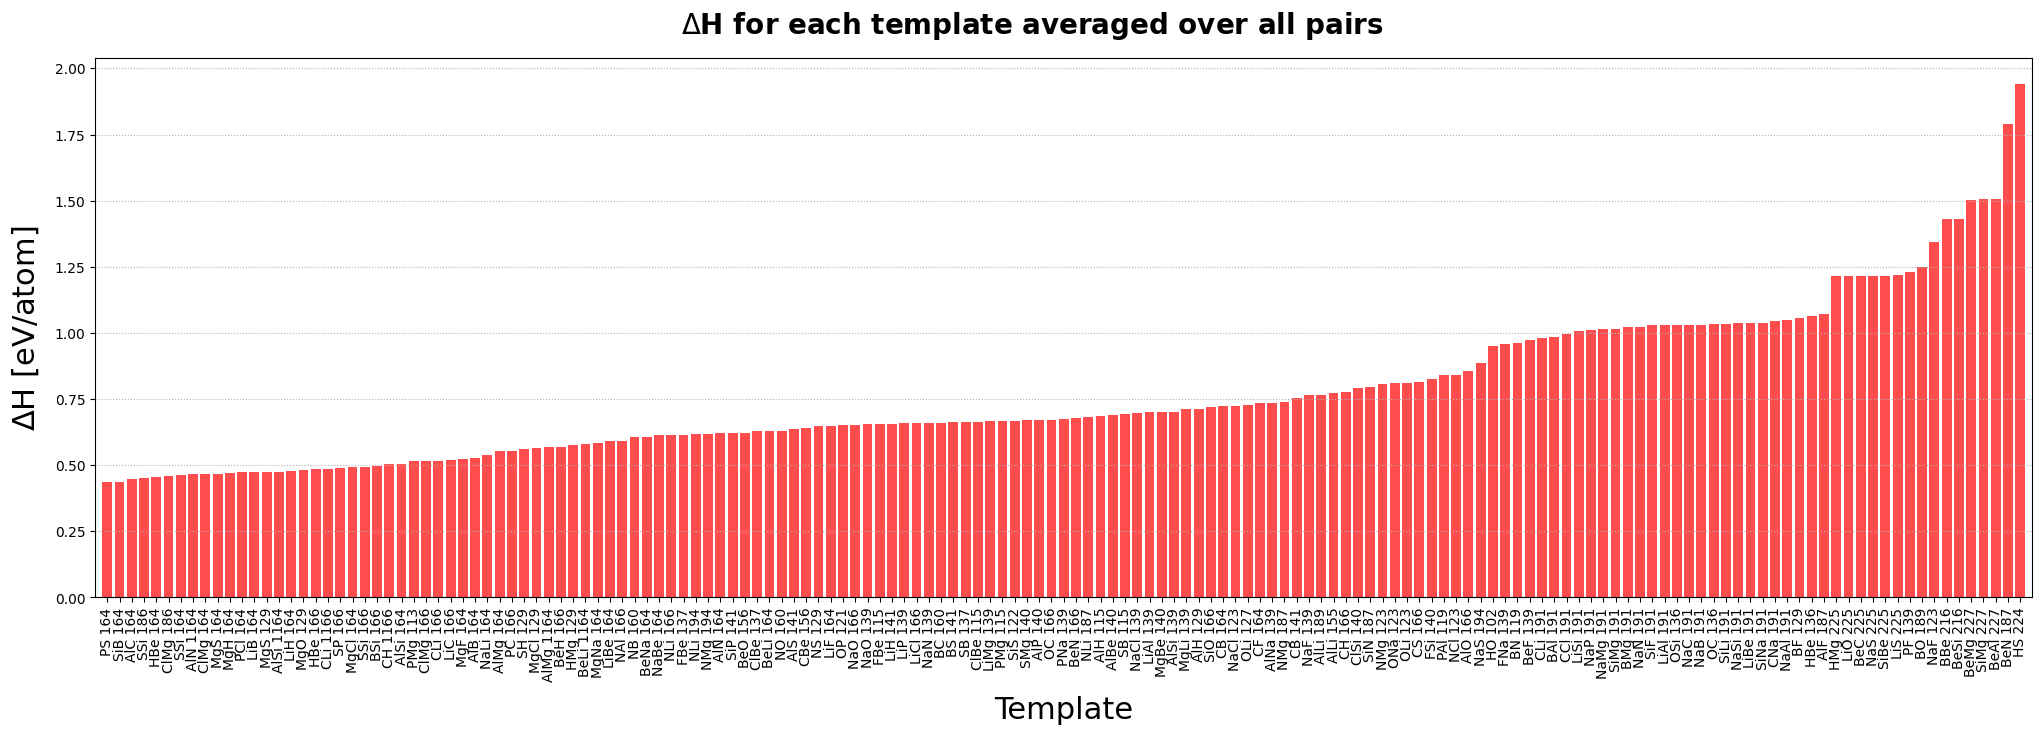

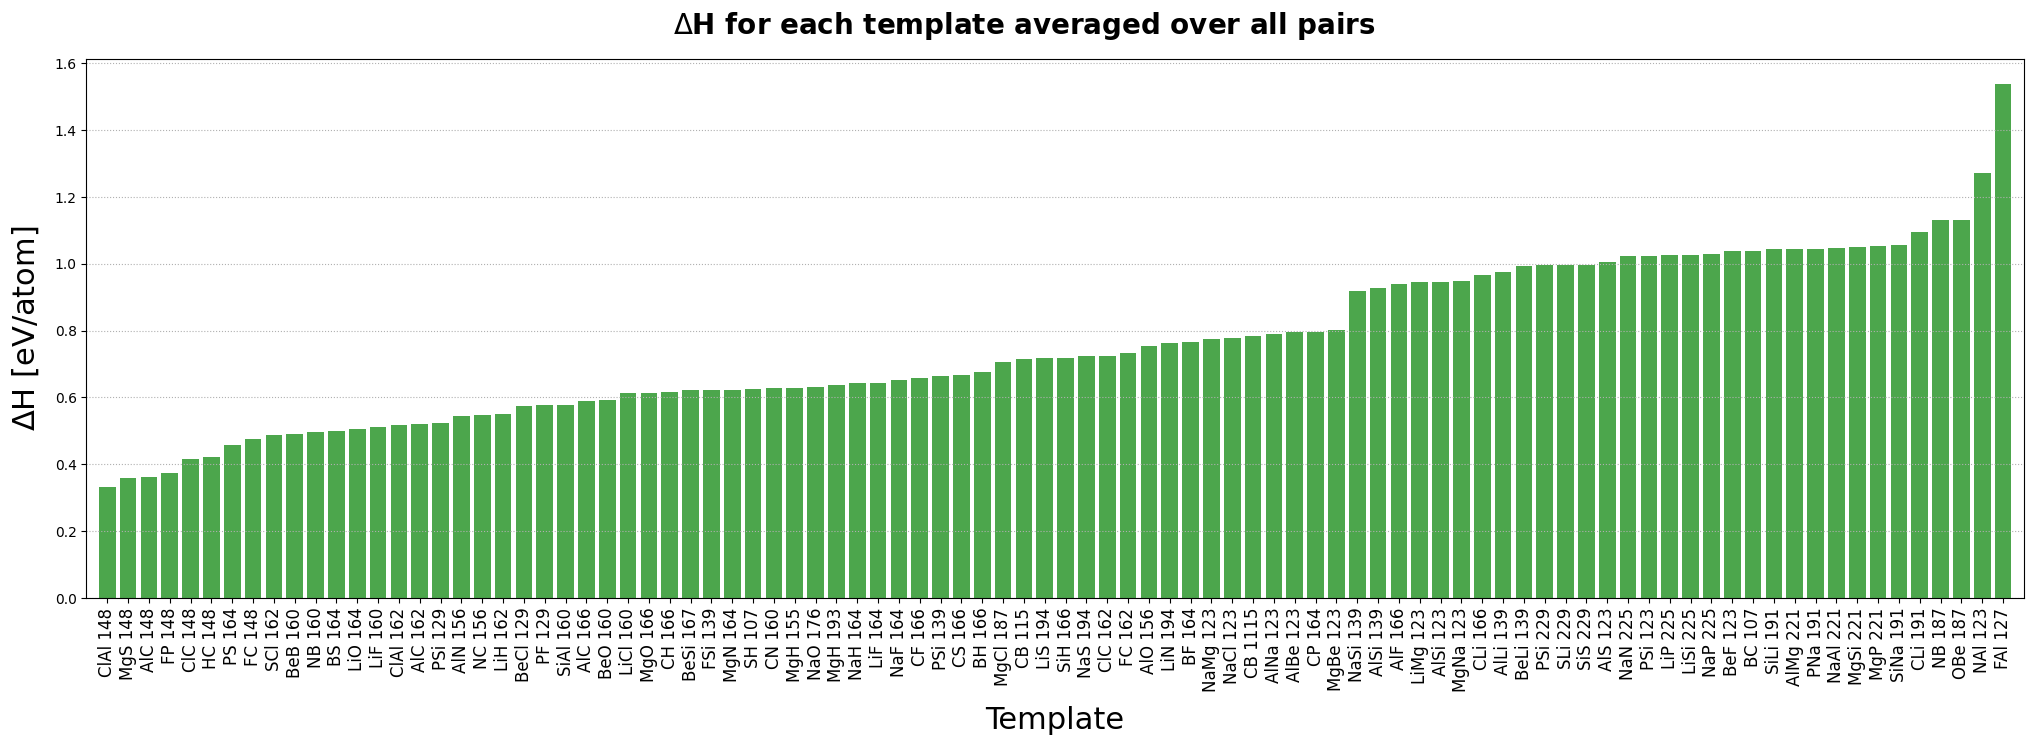

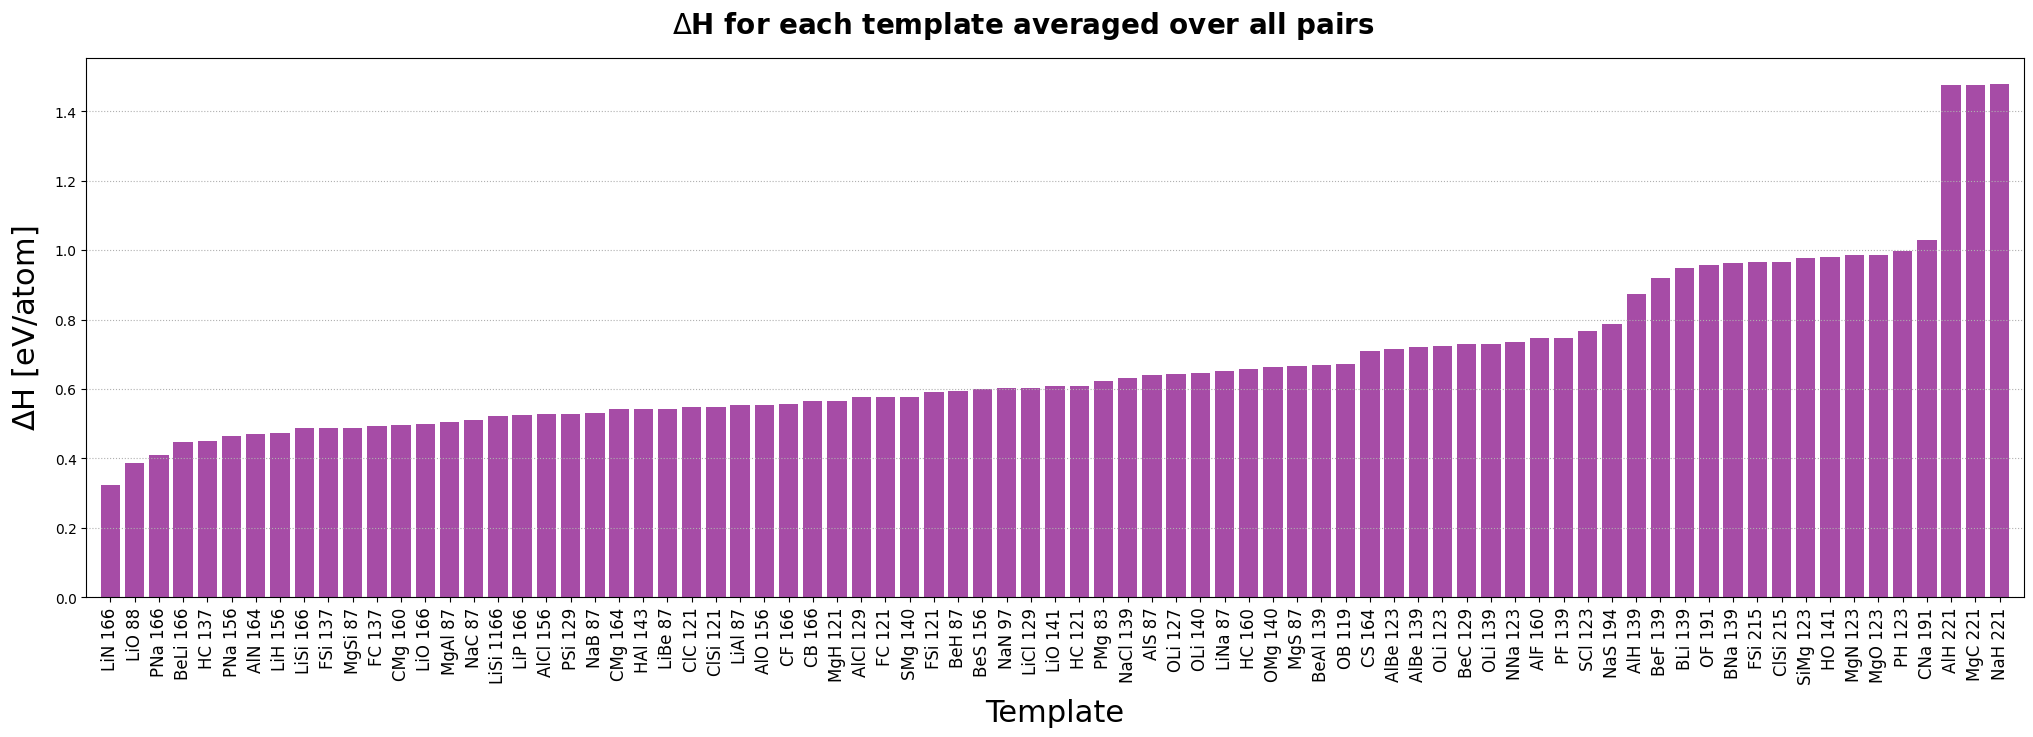

In [1]:
import json
import matplotlib.pyplot as plt

color_list = ['blue', 'red', 'green', 'purple']
comp_list = [1,2,3,4]

for idx, comp in enumerate(comp_list):
    if comp == 1:
        num_pairs = 105
    else:
        num_pairs = 210
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data = json.load(f)

    with open(f'ENTHALPY/EntGS.json', 'r') as f:
        gs_dict = json.load(f)

    title = r'$\Delta$H for each template averaged over all pairs'
    fig, ax = plt.subplots(1, 1, figsize=(25, 7))

    temp_dict = {}

    count = 0
    for pair in data.keys():
        count +=1
        for temp in data[pair].keys():
            if temp not in temp_dict.keys():
                temp_dict[temp] = (data[pair][temp] - gs_dict[f'{comp}'][pair])/num_pairs
            else:
                temp_dict[temp] += (data[pair][temp] - gs_dict[f'{comp}'][pair])/num_pairs
    
    # Ordina i template in base ai valori delle entalpie
    sorted_items = sorted(temp_dict.items(), key=lambda x: x[1])  
    sorted_keys, sorted_values = zip(*sorted_items)  # Divide in due liste ordinate


    fig.suptitle(title, fontsize=20, y=0.95, fontweight='bold')
    ax.bar(sorted_keys, sorted_values, color=color_list[idx], alpha=0.7)
    ax.set_ylabel(r'$\Delta$H [eV/atom]', fontsize=22, labelpad=10)

    ax.set_xlim(-1, len(temp_dict.keys()))
    ax.set_xlabel('Template', fontsize=22, labelpad=10)
    ax.set_xticks(range(len(sorted_keys)))
    fontsize = 12
    if comp == 2:
        fontsize = 10
    ax.set_xticklabels([f'{i.split("_")[0]} {i.split("_")[1]}' for i in sorted_keys], fontsize=fontsize, rotation=90)


    ax.grid(True, ls=':', axis='y')





### ADAPTABILITY OVER TEMPLATES

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Carica i dati
with open('ENTHALPY/EntGS.json', 'r') as f:
    gs_dict = json.load(f)

elements = ['H', 'Li', 'O', 'Na', 'N', 'Mg', 'Si', 'S', 'Be', 'B', 'Al', 'C', 'F', 'P', 'Cl']

color_list = ['blue', 'red', 'green', 'purple']

for idx, comp in enumerate(gs_dict.keys()):
    if comp in ['6']:
        continue

    pair_count_dict = {}
    with open(f'ENTHALPY/A{comp}B.json', 'r') as f:
        data_ent = json.load(f)
    
    for pair in data_ent.keys():
        pair_count_dict[pair] = 0
        for temp in data_ent[pair].keys():
            if data_ent[pair][temp] - gs_dict[comp][pair] < 0.1:
                pair_count_dict[pair] += 1

    sorted_items = sorted(pair_count_dict.items(), key=lambda x: x[1])  
    sorted_keys, sorted_values = zip(*sorted_items)  # Divide in due liste ordinate

    fig, ax = plt.subplots(1, 1, figsize=(10, 30))
    title = r'Number of templates with $\Delta$H < 0.1 eV/atom' + f' A$_{comp}$B'
    fig.suptitle(title, fontsize=20, y=0.9, fontweight='bold')
    
    ax.barh(sorted_keys, sorted_values, color=color_list[idx], alpha=0.7)
    ax.set_xlabel(r'Number of templates', fontsize=22, labelpad=10, family='serif')

    ax.set_ylim(-1, len(pair_count_dict.keys()))
    ax.set_ylabel('Pair', fontsize=22, labelpad=10, family='serif')
    ax.set_yticks(range(len(sorted_keys)))
    fontsize = 12
    if comp != '1':
        fontsize = 8
    ax.set_yticklabels([f'{i}' for i in sorted_keys], fontsize=fontsize)


    ax.grid(True, ls=':', axis='y')

    

    plt.show()


# TRENDS WITHOUT CRITICAL PAIRS

### PRODUCTION OF DATA

In [14]:
from template_csp import managetemp as mt
import json
import os
import numpy as np

from tqdm import tqdm

test_elements = ['Be', 'B', 'N', 'Mg', 'O', 'Li', 'C', 'Na', 'Si', 'S', 'Cl', 'F', 'P', 'H', 'Al']

hyperparameters = { 
    "weight_occurrence" : 1,
    "weight_sg" : 0.001,
    "weight_formation_entalphy" : 1, 
    "comp" : 1,
    "lev_red" : 0.9,
    "n_pairs" : 105,

    "n_final_templates" : 1
}


complist = [1, 2, 3, 4, 6] 
initlist = [86, 156, 92, 79, 41] # 86 
mother_dir = './HvsINIT/'
path_to_critical_pairs = 'DATA_DICT/CriticalPairs.json'

for comp in complist:
    dir_comp = mother_dir + f'{comp}/'
    hyperparameters['comp'] = comp
    means = np.zeros(initlist[complist.index(comp)])
    stds = np.zeros(initlist[complist.index(comp)])

    for size_initial in tqdm(range(1, initlist[complist.index(comp)]+1)):
        dir_init = dir_comp + f'{size_initial}/'
        errors_bef = np.zeros(20)

        
        for step in range(0,20):
            file_restart = dir_init + f'InitialSet_{step}'

            initial_set = mt.InitialSet(test_elements=test_elements, hyperparameters=hyperparameters, restart_file=file_restart)
            errors_bef[step] = initial_set.difference_from_uspex(path_to_critical_pairs)

        means[size_initial-1] = np.mean(errors_bef)
        stds[size_initial-1] = np.std(errors_bef)

        if size_initial == 1:
            with open(dir_comp + 'BeforeNoCritical0.csv', 'w') as f:
                f.write(f'{size_initial-1},{means[size_initial-1]},{stds[size_initial-1]}\n')
        else:
            with open(dir_comp + 'BeforeNoCritical0.csv', 'a') as f:
                f.write(f'{size_initial-1},{means[size_initial-1]},{stds[size_initial-1]}\n')
        

  0%|          | 0/86 [00:00<?, ?it/s]

100%|██████████| 41/41 [00:12<00:00,  3.27it/s]


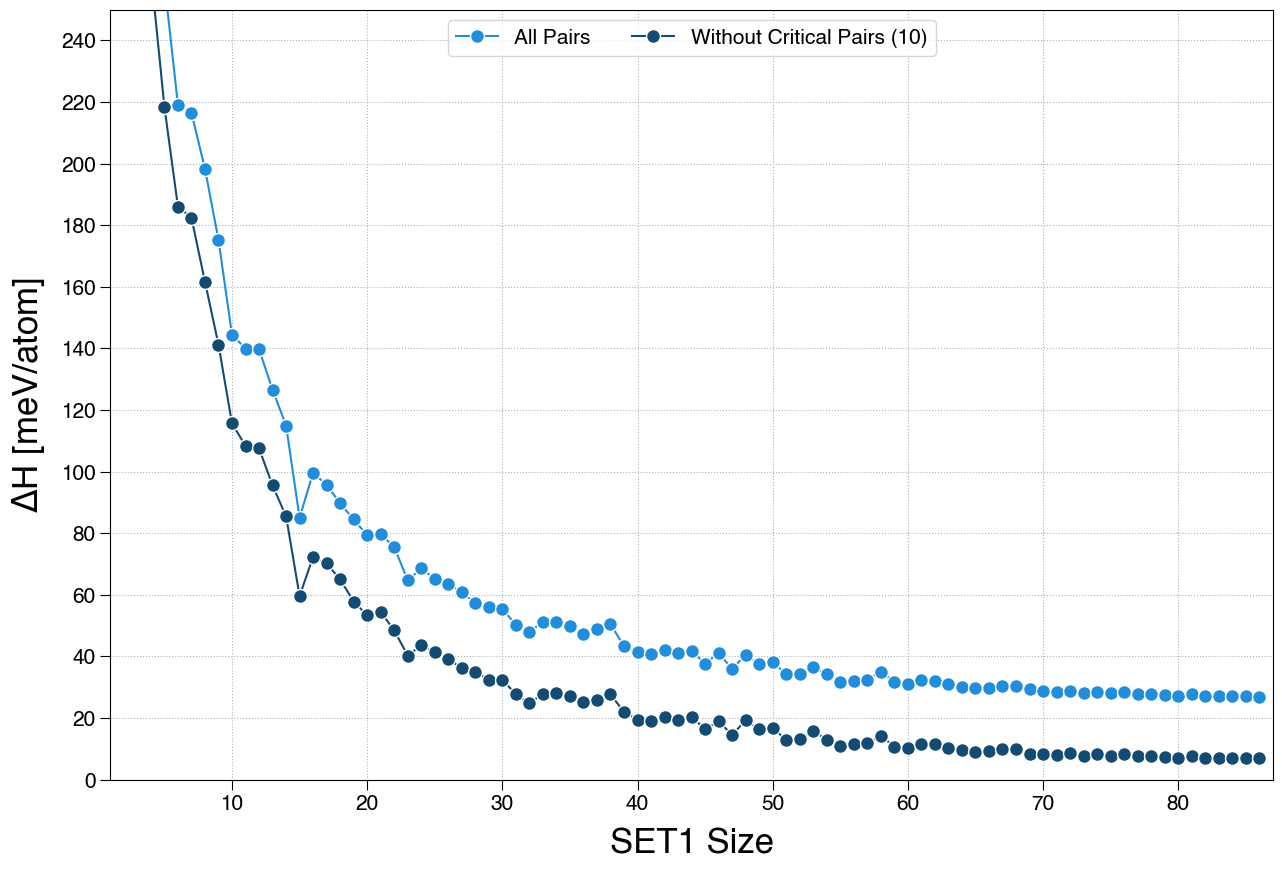

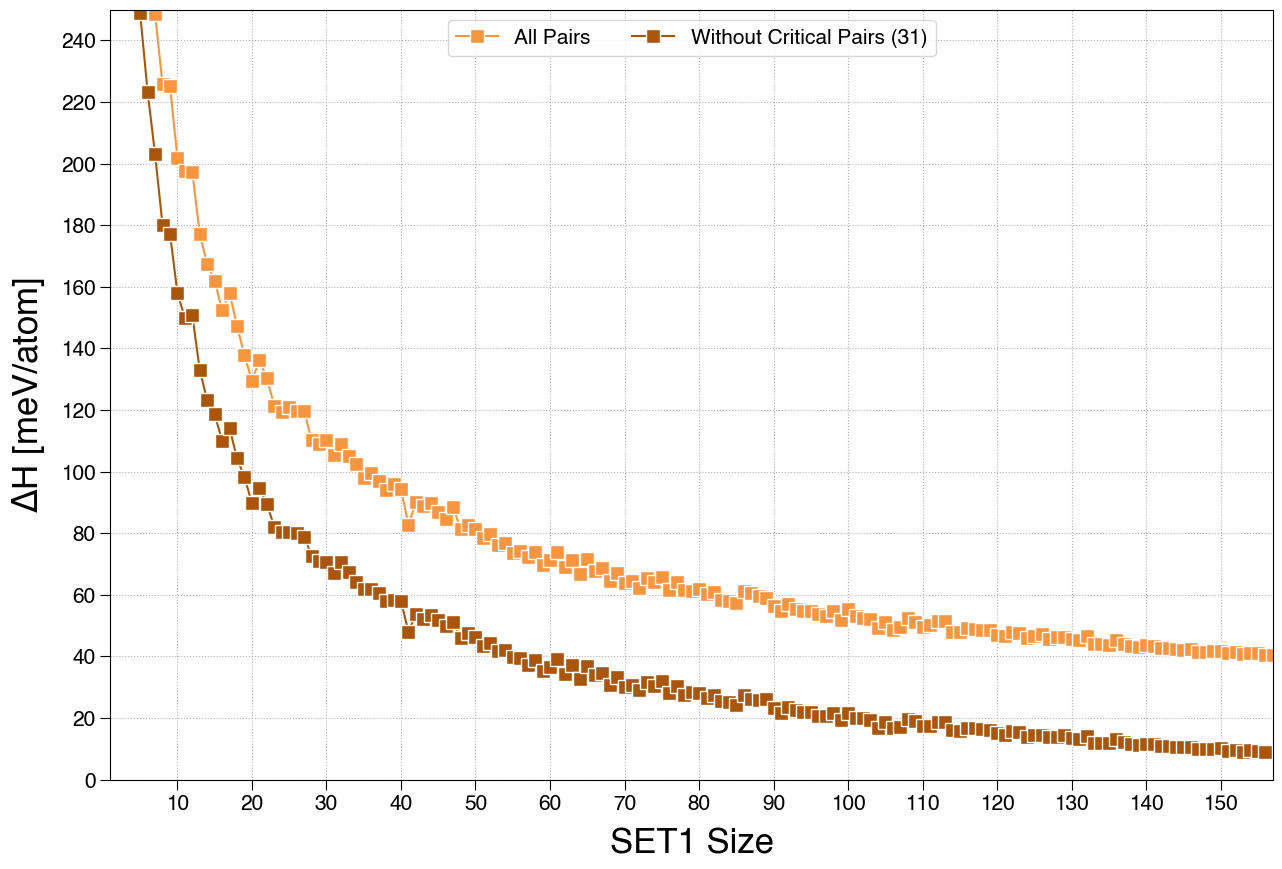

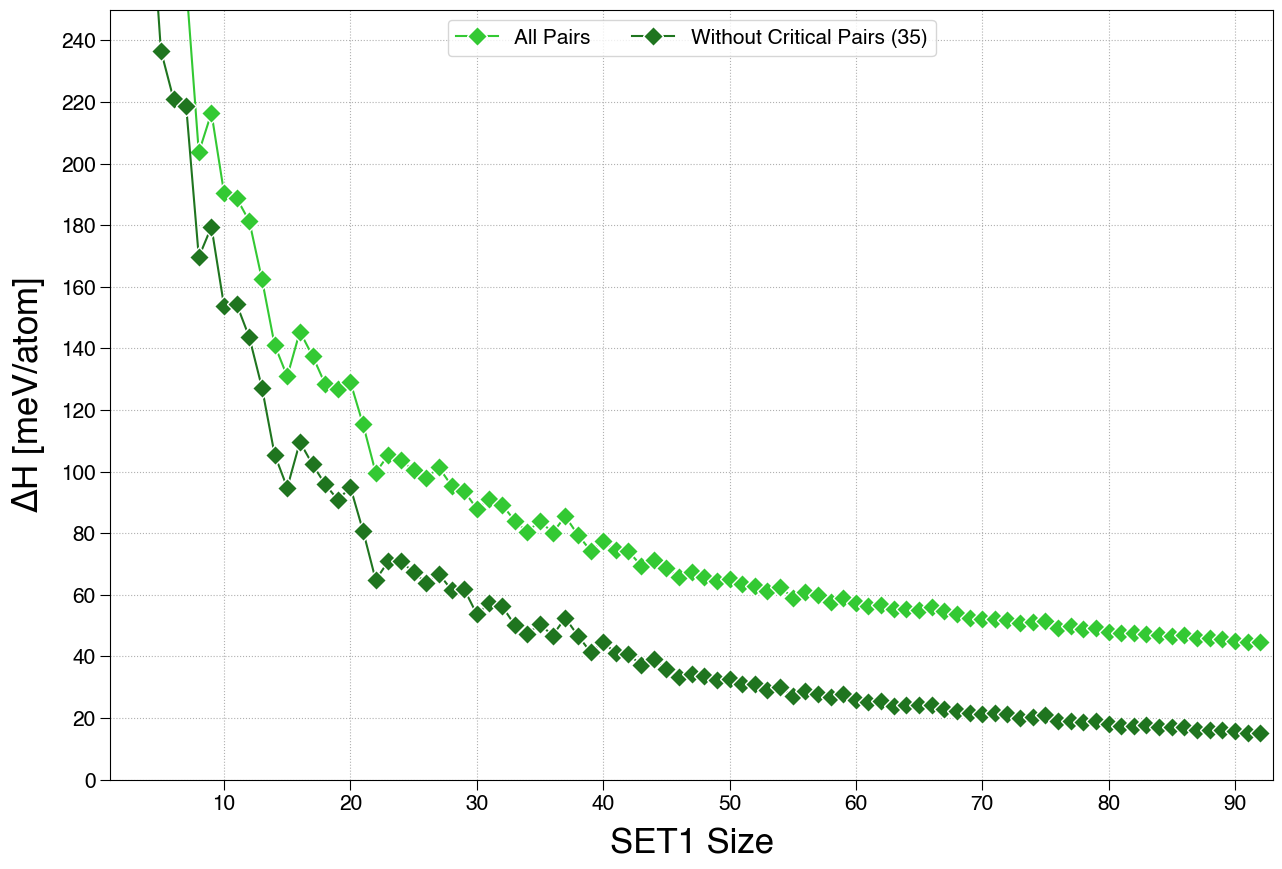

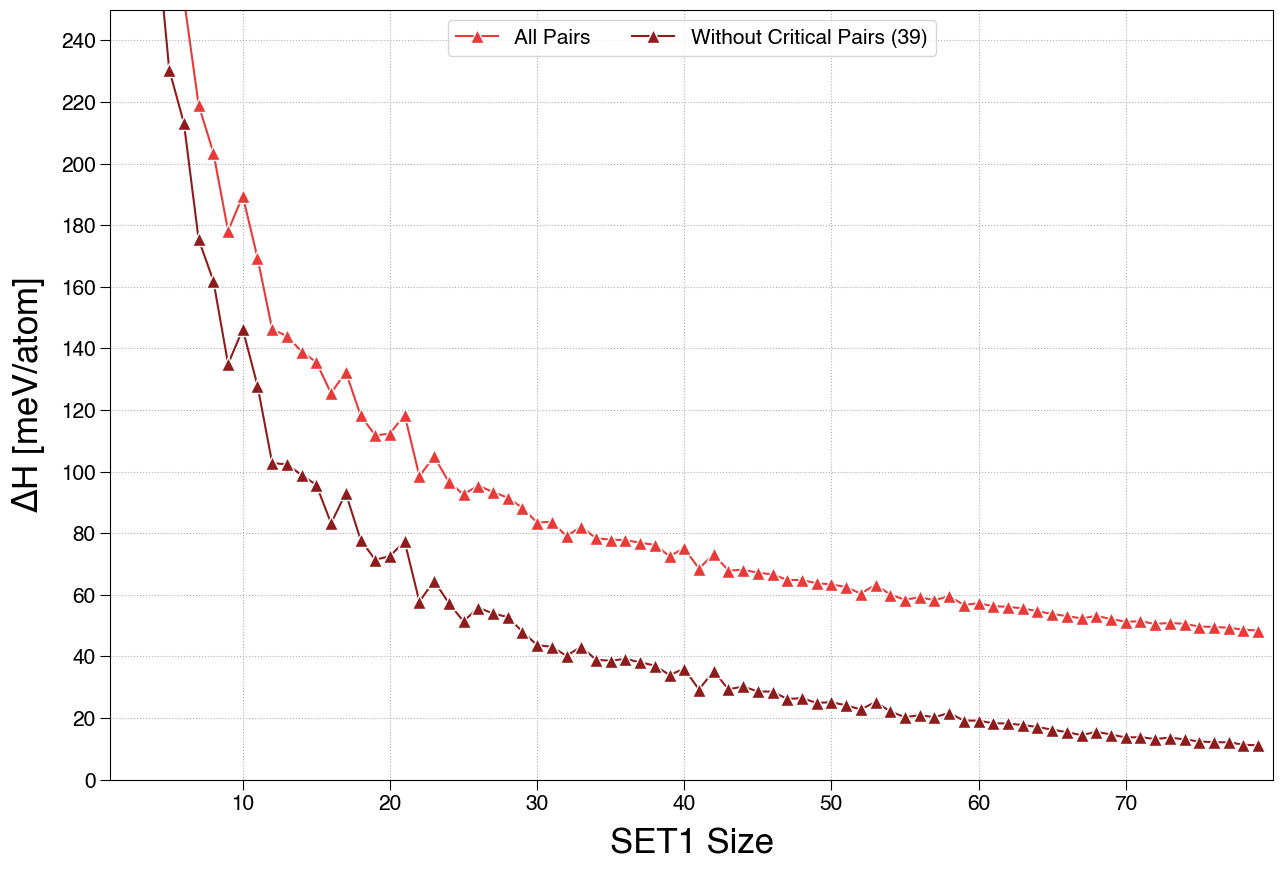

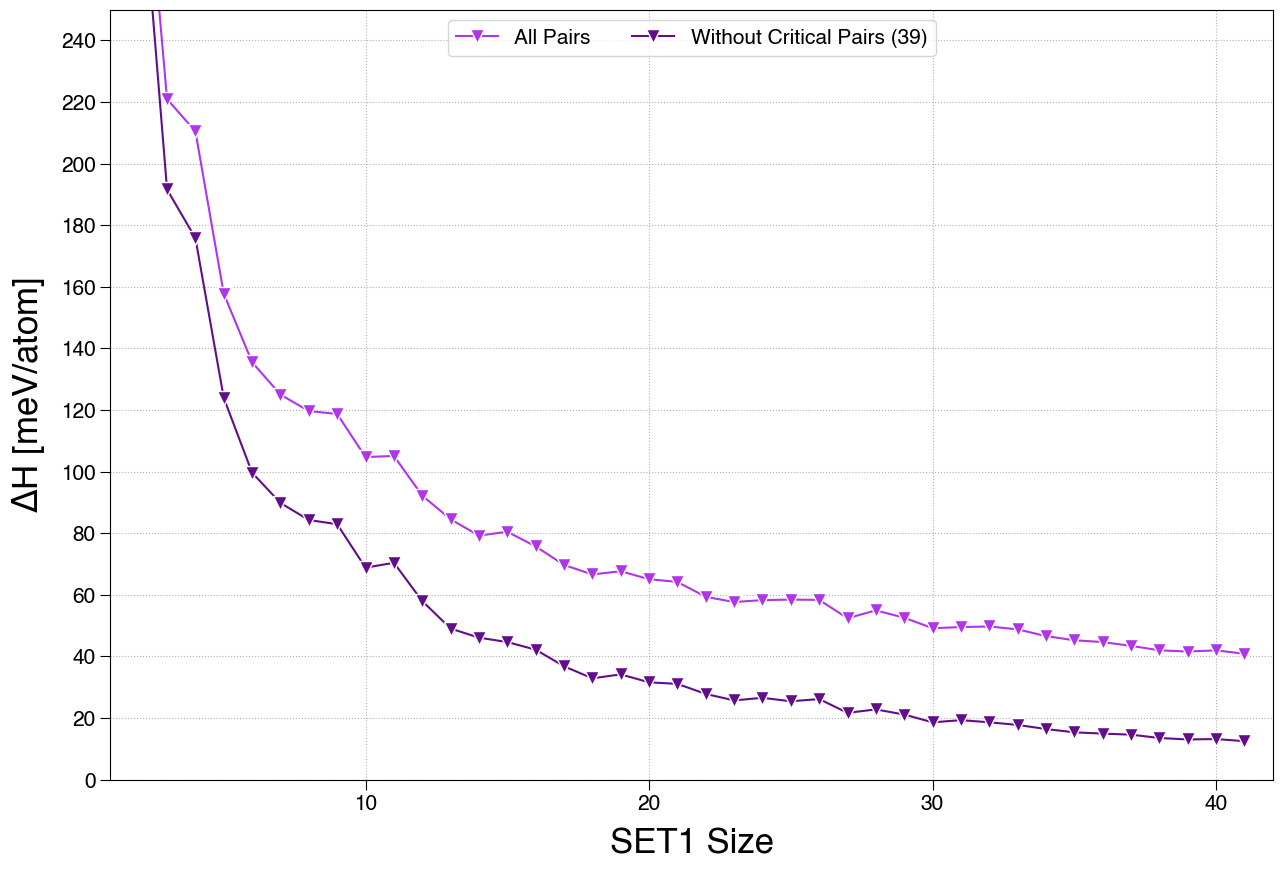

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib

# load font
matplotlib.rcParams['font.family'] = 'Helvetica'


mother_dir = './HvsINIT/'


complist = [1,2,3,4,6]
markerlist = ['o', 's', 'D', '^', 'v']
colorlist = ["#228dda", "#f8953f", "#33C933", "#e93a3a", "#b035e9"]
colorlist2 = ["#144b72", "#aa550a", "#1F751F", "#8f1c1c", "#620d8a"]

critpairslist = ['10', '31', '35', '39', '39']

for i, comp in enumerate(complist):

    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    fig.subplots_adjust(hspace=0.0)
    max_x_ticks = np.array([])

    dir_name = f'{comp}'
    df_tot = pd.read_csv(mother_dir + f'{dir_name}/TotalStaticsBefore.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1)

    ax.plot(x, tot[0] , marker = markerlist[i], markeredgecolor='white', markersize=10, label=f'All Pairs', color=colorlist[i])

    df_tot = pd.read_csv(mother_dir + f'{dir_name}/BeforeNoCritical0.csv', header=None, na_filter=False, index_col = 0)
    tot = (df_tot.to_numpy()).T * 1000

    x = np.arange(1, len(tot[0])+1)

    ax.plot(x, tot[0] , marker = markerlist[i], markeredgecolor='white', markersize=10, label=f'Without Critical Pairs ({critpairslist[i]})', color=colorlist2[i])

    max_x_ticks = np.append(max_x_ticks, len(tot[0]))

    ax.set_ylabel(r'$\Delta$H [meV/atom]', fontsize=25, labelpad=10)
    step = 20
    # y_ticks  = np.arange(0,250,step, dtype=float)
    # ax.set_yticks(y_ticks)
    # ax.set_yticklabels([f'{i:.0f}' for i in y_ticks])
    ax.set_ylim(0,250)
    ax.yaxis.set_major_locator(plt.MultipleLocator(20))


    ax.set_xlabel('SET1 Size', fontsize=25, labelpad=10)
    xticks = np.arange(0, max(max_x_ticks)+1, 10)
    ax.set_xticks(xticks)
    ax.set_xlim(1,max(max_x_ticks)+1)
    ax.set_xticklabels([f'{i:.0f}' for i in xticks])

    ax.tick_params(size=7, labelsize=15)

    ax.grid(True, ls=':')
    ax.legend(loc='upper center', ncol=2, prop={'size': 15})

    plt.show()
    fig.savefig('FIG/Articolo/SuppCrit_' + f'A{comp}B.png', bbox_inches='tight')
